In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
df = pd.read_csv('./data/OnlineRetail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [174]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

###### CustomerID가 없는 col 삭제

In [175]:
df = df[pd.notnull(df['CustomerID'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


##### Quantity가 1이상, UnitPrice가 1이상

In [176]:
df= df[(df.Quantity > 0) & (df.UnitPrice > 0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


##### CustomerID의 type을 int로 변경

In [177]:
df.CustomerID = df.CustomerID.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  int32  
 7   Country      397884 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 25.8+ MB


##### UnitPrice와 Quantity를 곱해서 CheckoutPrice를 새로 만듬

In [178]:
df['CheckoutPrice'] = df.UnitPrice * df.Quantity
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


##### df 를 OnlineRetailClean.csv로 저장

In [179]:
df.to_csv('./data/OnlineRetailClean.csv')

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      397884 non-null  object 
 1   StockCode      397884 non-null  object 
 2   Description    397884 non-null  object 
 3   Quantity       397884 non-null  int64  
 4   InvoiceDate    397884 non-null  object 
 5   UnitPrice      397884 non-null  float64
 6   CustomerID     397884 non-null  int32  
 7   Country        397884 non-null  object 
 8   CheckoutPrice  397884 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 28.8+ MB


##### InvoiceDate의 type를  datetime 로 변경

In [181]:
df['InvoiceDate'] =  pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397884 non-null  object        
 1   StockCode      397884 non-null  object        
 2   Description    397884 non-null  object        
 3   Quantity       397884 non-null  int64         
 4   InvoiceDate    397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float64       
 6   CustomerID     397884 non-null  int32         
 7   Country        397884 non-null  object        
 8   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 28.8+ MB


##### 총 매출액

In [182]:
df.CheckoutPrice.sum()

8911407.904

##### 국가별 총매출
    상위 50개국 bar_chart로 추출

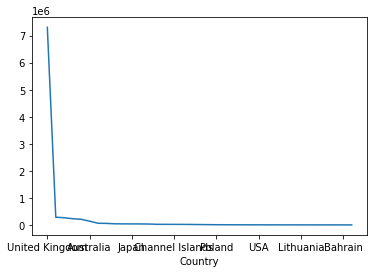

In [183]:
df.groupby('Country').CheckoutPrice.sum().sort_values(ascending = False)[:50].plot()

##### 국가별 매출 비중

In [184]:
df.groupby('Country').CheckoutPrice.sum()/df.CheckoutPrice.sum()

Country
Australia               0.015544
Austria                 0.001144
Bahrain                 0.000062
Belgium                 0.004623
Brazil                  0.000128
Canada                  0.000411
Channel Islands         0.002295
Cyprus                  0.001525
Czech Republic          0.000093
Denmark                 0.002127
EIRE                    0.029798
European Community      0.000146
Finland                 0.002530
France                  0.023456
Germany                 0.025682
Greece                  0.000534
Iceland                 0.000484
Israel                  0.000810
Italy                   0.001962
Japan                   0.004199
Lebanon                 0.000190
Lithuania               0.000186
Malta                   0.000306
Netherlands             0.032032
Norway                  0.004058
Poland                  0.000823
Portugal                0.003752
RSA                     0.000112
Saudi Arabia            0.000016
Singapore               0.002388
Sp

##### 월별매출액을 bar_chart

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397884 non-null  object        
 1   StockCode      397884 non-null  object        
 2   Description    397884 non-null  object        
 3   Quantity       397884 non-null  int64         
 4   InvoiceDate    397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float64       
 6   CustomerID     397884 non-null  int32         
 7   Country        397884 non-null  object        
 8   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 28.8+ MB


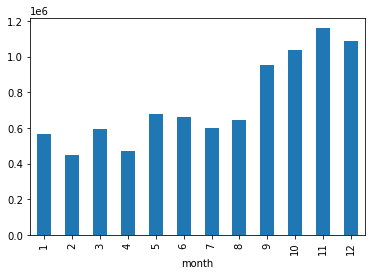

In [186]:
df['month'] = df.InvoiceDate.dt.month
df.groupby('month').CheckoutPrice.sum().plot(kind = 'bar')

##### 연도, 월별 매출액 bar_chart

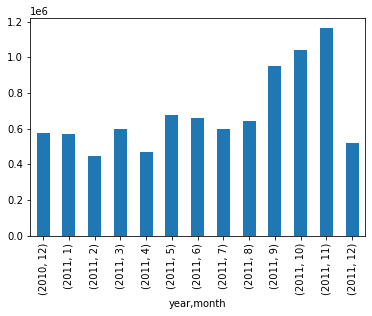

In [187]:
df['year'] = df.InvoiceDate.dt.year
df.groupby(['year','month']).CheckoutPrice.sum().plot(kind = 'bar')

##### 요일별 매출액 bar_chart

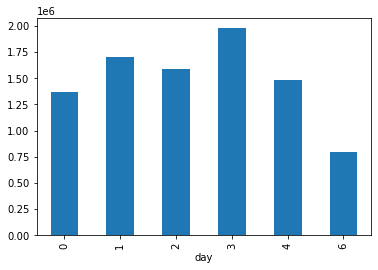

In [188]:
df['day'] = df.InvoiceDate.dt.dayofweek
df.groupby('day').CheckoutPrice.sum().plot(kind = 'bar')

##### 시간대별 매출액 분석(bar_chart)

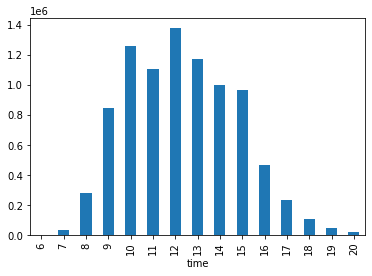

In [189]:
df['time'] = df.InvoiceDate.dt.hour
df.groupby('time').CheckoutPrice.sum().plot(kind = 'bar')

##### 매출 10대 상품(code)

In [190]:
code = df.groupby('StockCode').CheckoutPrice.sum().sort_values(ascending = False)[:10].index
code

Index(['23843', '22423', '85123A', '85099B', '23166', 'POST', '47566', '84879',
       'M', '23084'],
      dtype='object', name='StockCode')

##### 매출 10대 상품의 DataFrame

In [191]:
df[df.StockCode.isin(code)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,month,year,day,time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2010,2,8
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,12,2010,2,8
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583,France,54.00,12,2010,2,8
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850,United Kingdom,15.30,12,2010,2,9
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850,United Kingdom,15.30,12,2010,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526,Germany,36.00,12,2011,4,12
541768,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713,Germany,54.00,12,2011,4,12
541824,581579,23084,RABBIT NIGHT LIGHT,24,2011-12-09 12:19:00,1.79,17581,United Kingdom,42.96,12,2011,4,12
541874,581585,23084,RABBIT NIGHT LIGHT,12,2011-12-09 12:31:00,2.08,15804,United Kingdom,24.96,12,2011,4,12


##### 매출 10대 상품의 월별 판매 추이를 bar

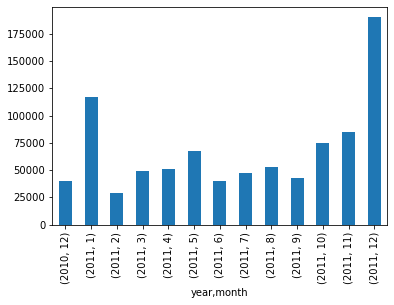

In [192]:
df[df.StockCode.isin(code)].groupby(['year','month']).CheckoutPrice.sum().plot(kind = 'bar')

##### +상품별 월별추이

(0.0, 30000.0)

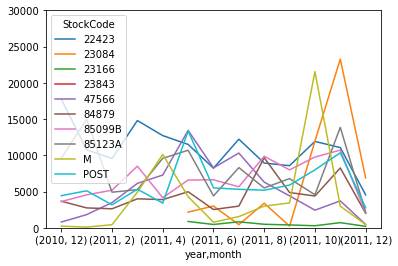

In [231]:
df[df.StockCode.isin(code)].groupby(['year','month','StockCode']).CheckoutPrice.sum().unstack().plot()
plt.ylim([0, 30000])
# plt.yticks(np.arange(0, 50000,5000))

### cohort 분석
    동질적인 집단을 묶어서 집단별로 분석

In [207]:
df1 = pd.read_csv('./data/OnlineRetailClean.csv', dtype = {'UnitPrice' : float, 'CustomerID' : int, 'Quantity':int})
df1.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [208]:
df1['InvoiceDate'] = pd.to_datetime(df1.InvoiceDate)
df1.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [209]:
from datetime import datetime

In [210]:
def get(date):
    return datetime(date.year, date.month, 1)      # 1) datetime 함수 사용시 import 필요 , 일자를 1로 정해줌

In [211]:
df1['month'] = df1.InvoiceDate.apply(get)
df1.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,month
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


#### 처음구매한 고객이 얼마나 지속적으로 구매하는지
    

##### 1) 고객별 최초구매월 출력 및 col추가

In [212]:
df1['monthstarted'] = df1.groupby('CustomerID').month.transform(min)
df1.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,month,monthstarted
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010-12-01
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010-12-01
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01


##### 2) 최초 구매이후 몇 개월이 지났는지 출력 및 col추가

In [227]:
df1['monthpassed'] = (df1.month.dt.year-df1.monthstarted.dt.year)*12 + df1.month.dt.month-df1.monthstarted.dt.month
df1.tail(10)

# invoicedate : 주문 시점의 날짜데이터
# month : 주문시점의 월 데이터
# monthstarted : 최초주문 시점 날짜
# monthpassed : 최초주문 이후 현재주문의 걸린기간

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,month,monthstarted,monthpassed
397874,541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680,France,15.00,2011-12-01,2011-08-01,4
397875,541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,15.00,2011-12-01,2011-08-01,4
397876,541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680,France,15.60,2011-12-01,2011-08-01,4
397877,541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680,France,23.40,2011-12-01,2011-08-01,4
397878,541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
397879,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01,4
397880,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01,4
397881,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
397882,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
397883,541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01,4


In [223]:
df1['monthpassed'] = df1.month -df1.monthstarted
df1.tail(10)

# invoicedate : 주문 시점의 날짜데이터
# month : 주문시점의 월 데이터
# monthstarted : 최초주문 시점 날짜
# monthpassed : 최초주문 이후 현재주문의 걸린기간

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,month,monthstarted,monthpassed
397874,541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680,France,15.00,2011-12-01,2011-08-01,122 days
397875,541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,15.00,2011-12-01,2011-08-01,122 days
397876,541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680,France,15.60,2011-12-01,2011-08-01,122 days
397877,541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680,France,23.40,2011-12-01,2011-08-01,122 days
397878,541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,122 days
397879,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01,122 days
397880,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01,122 days
397881,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,122 days
397882,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,122 days
397883,541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01,122 days


In [164]:
def get_unique(x) :         # 데이터의 갯수 출력
    return len(np.unique(x))

In [228]:
cohort_group = df1.groupby(['monthstarted','monthpassed'])

In [229]:
cohort_df = cohort_group['CustomerID'].agg(get_unique)
cohort_df

monthstarted  monthpassed
2010-12-01    0              885
              1              324
              2              286
              3              340
              4              321
                            ... 
2011-10-01    1               86
              2               41
2011-11-01    0              323
              1               36
2011-12-01    0               41
Name: CustomerID, Length: 91, dtype: int32

In [230]:
cohort_df.unstack()

monthpassed,0,1,2,3,4,5,6,7,8,9,10,11,12
monthstarted,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


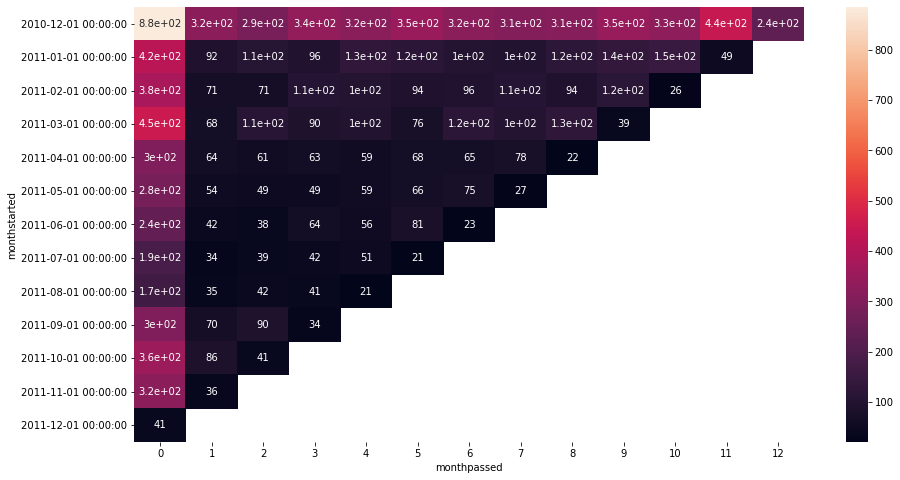

In [171]:
xticks = np.arange(0,13)
yticks = cohort_df.unstack().index


plt.figure(figsize = (15,8))
sns.heatmap(cohort_df.unstack(),annot = True, xticklabels = xticks, yticklabels = yticks)